# PROJECT TITLE : **Exploratory Data Analysis (EDA) on Retail Sales Data**

### IMPORTING LIBRARIES

In [246]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## DATA LOADING AND CLEANING

In [4]:
# LOADING DATA
df = pd.read_csv(r"D:\Oasis_Info_Byte\1_EDA_Retail_Sales\retail_sales_dataset.csv")

# DISPLAY ALL ROWS IN A DATASET
pd.set_option("display.max_rows", None)
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


## DATA OVERVIEW

In [7]:
# Getting Informtation about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
# Checking nuls
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
# Checking duplicates
df.duplicated().sum()

0

In [13]:
# Quick numerical overview
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Transaction ID,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
Date,1000,345,2023-05-16,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Customer ID,1000,1000,CUST001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,1000,2,Female,510,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1000.0,NaN,NaN,NaN,41.392,13.68143,18.0,29.0,42.0,53.0,64.0
Product Category,1000,3,Clothing,351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,1000.0,NaN,NaN,NaN,2.514,1.132734,1.0,1.0,3.0,4.0,4.0
Price per Unit,1000.0,NaN,NaN,NaN,179.89,189.681356,25.0,30.0,50.0,300.0,500.0
Total Amount,1000.0,NaN,NaN,NaN,456.0,559.997632,25.0,60.0,135.0,900.0,2000.0


##  Descriptive Statistics: Calculating basic statistics (mean, median, mode, standard deviation).

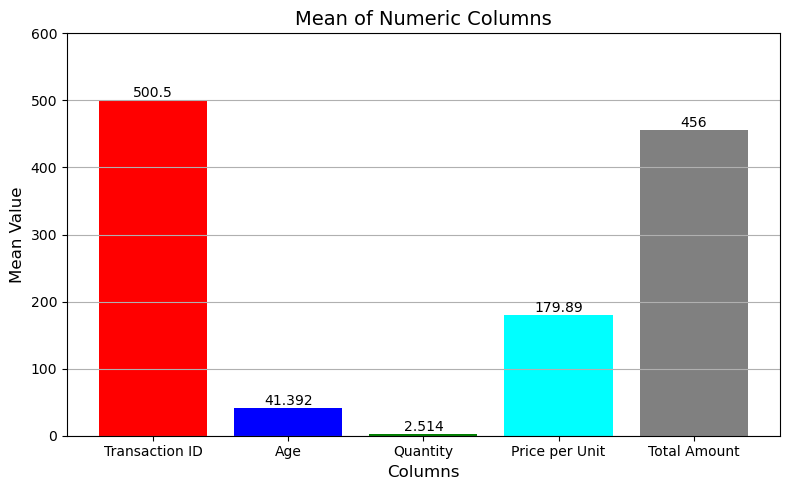

Transaction ID    500.500
Age                41.392
Quantity            2.514
Price per Unit    179.890
Total Amount      456.000
dtype: float64

In [19]:
# MEAN OF NUMERICAL COLUMNS
mean_values = df.mean(numeric_only=True)
plt.figure(figsize=(8, 5))
colors = ["red", "blue", "green", "cyan", "grey"][:len(mean_values)]
ax = sns.barplot(x = mean_values.index, y = mean_values.values, width = 0.5) 
for container in ax.containers:
    ax.bar_label(container)
for i, color in enumerate(colors):
    plt.bar(mean_values.index[i], mean_values.values[i], color=color)
    plt.ylim(0,600)
plt.title('Mean of Numeric Columns', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()
mean_values

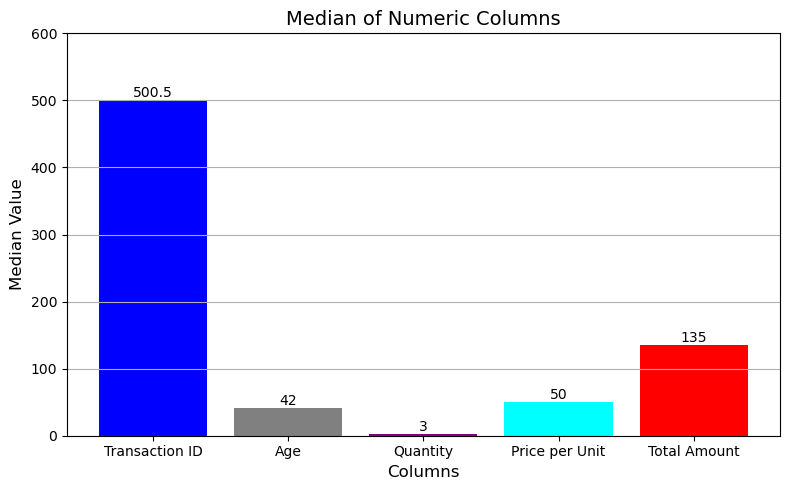

Transaction ID    500.5
Age                42.0
Quantity            3.0
Price per Unit     50.0
Total Amount      135.0
dtype: float64

In [17]:
# MEDIAN OF NUMERICAL COLUMNS
median_values = df.median(numeric_only=True)
plt.figure(figsize=(8, 5))
colors = ["blue", "grey", "purple", "cyan", "red"][:len(median_values)]
ax = sns.barplot(x=median_values.index, y=median_values.values, width=0.5) 
for container in ax.containers:
    ax.bar_label(container)
for i, color in enumerate(colors):
    plt.bar(median_values.index[i], median_values.values[i], color=color)
plt.ylim(0,600)
plt.title('Median of Numeric Columns', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Median Value', fontsize=12)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()
median_values

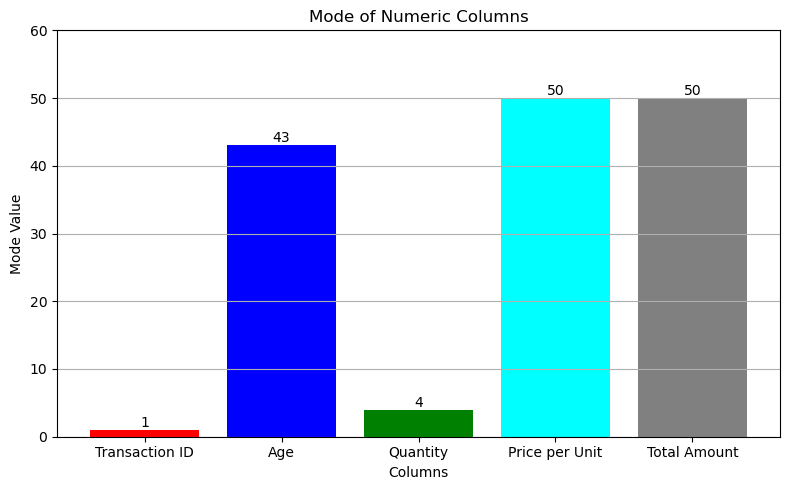

Transaction ID     1.0
Age               43.0
Quantity           4.0
Price per Unit    50.0
Total Amount      50.0
Name: 0, dtype: float64

In [21]:
# MODE
mode_values = df.mode(numeric_only=True).iloc[0]  
plt.figure(figsize=(8, 5)) 
colors = ["red", "blue", "green", "cyan", "grey"][:len(mode_values)]   
ax = sns.barplot(x=mode_values.index, y=mode_values.values, width=0.5) 
for container in ax.containers:
    ax.bar_label(container)
for i, color in enumerate(colors):  
    plt.bar(mode_values.index[i], mode_values.values[i], color=color)  
plt.ylim(0,60)
plt.title('Mode of Numeric Columns', fontsize=12)  
plt.xlabel('Columns', fontsize=10)  
plt.ylabel('Mode Value', fontsize=10)   
plt.grid(axis='y')  
plt.tight_layout()  
plt.show() 
mode_values

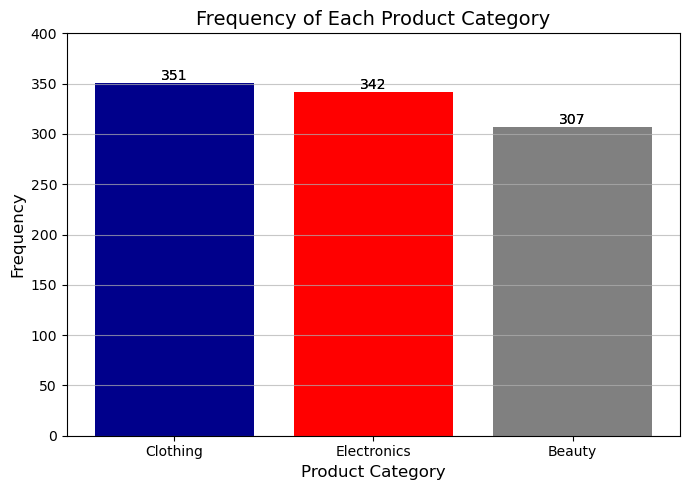

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64

In [25]:
# EACH PRODUCT FREQUENCY
product_catg = df["Product Category"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 5))
ax = sns.barplot(x=product_catg.index, y=product_catg.values, width = 0.4) 
colors = (["darkblue","red", "grey"])
for i,color in enumerate(colors):
    plt.bar(product_catg.index[i],product_catg.values[i], color = color)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Frequency of Each Product Category", fontsize=14)
plt.ylim(0,400)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='-', alpha=0.7)  
plt.tight_layout()
plt.show()
product_catg

In [447]:
# PRICE PER UNIT FREQUENCY
df["Price per Unit"].value_counts().sort_values(ascending = False)

Price per Unit
50     211
25     210
500    199
300    197
30     183
Name: count, dtype: int64

In [219]:
# TOTAL AMOUNT FREQUENCY
df["Total Amount"].value_counts().sort_values(ascending = False)

Total Amount
50      115
100     108
900      62
200      62
1200     54
30       51
500      51
25       51
1500     50
2000     49
1000     49
300      46
60       45
90       44
120      43
75       43
150      42
600      35
Name: count, dtype: int64

In [17]:
# AGE FREQUENCY 
df["Age"].value_counts().sort_values(ascending = False)

Age
43    31
64    31
57    30
51    30
34    28
54    28
22    27
62    27
42    26
47    26
46    25
40    24
23    24
27    23
50    23
52    22
60    22
30    22
26    22
31    22
35    22
55    21
19    21
20    21
18    21
41    21
28    21
21    20
25    20
49    19
56    19
32    19
38    19
61    18
39    18
48    18
59    17
53    17
63    17
45    17
29    16
37    16
36    15
44    15
24    15
58    14
33    10
Name: count, dtype: int64

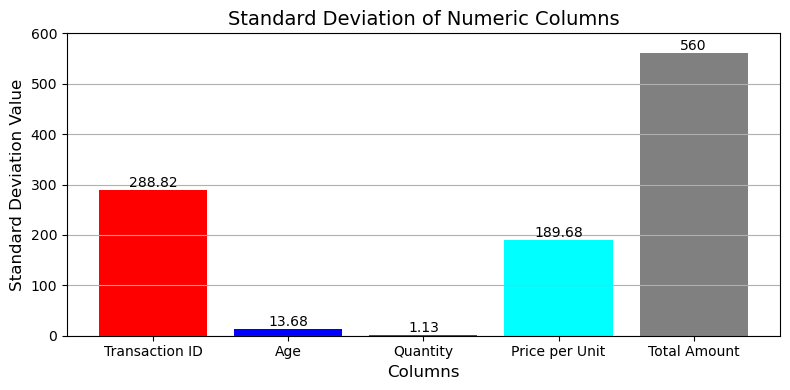

Transaction ID    288.82
Age                13.68
Quantity            1.13
Price per Unit    189.68
Total Amount      560.00
dtype: float64

In [209]:
# STANDARD DEVIATION OF NUMERIC COLUMNS
std_values = df.std(numeric_only=True).round(2)
plt.figure(figsize=(8, 4))
colors = ["red", "blue", "green", "cyan", "grey"][:len(std_values)]
ax = sns.barplot(x=std_values.index, y=std_values.values, width=0.4)
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0,600)
for i, color in enumerate(colors):
    plt.bar(std_values.index[i], std_values.values[i], color=color)
plt.title('Standard Deviation of Numeric Columns', fontsize=14)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Standard Deviation Value', fontsize=12)  
plt.grid(axis='y') 
plt.tight_layout() 
plt.show()
std_values

## Customer and Product Analysis: Analyze customer demographics and purchasing behavior.

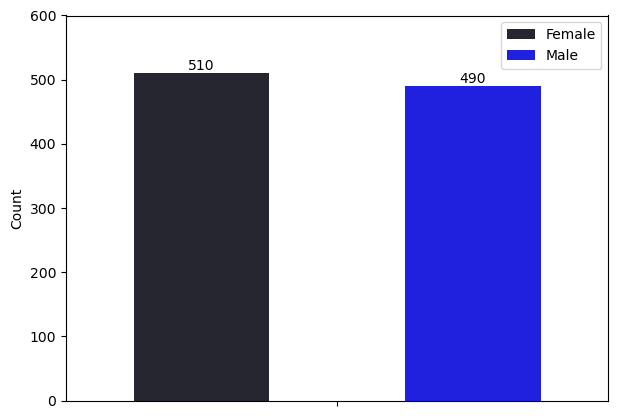

,Gender,Count
0,Female,510
1,Male,490


In [153]:
# Gender Distribution
gender_count = df["Gender"].value_counts().reset_index(name = "Count")
plt.figure(figsize = (7,5))
ax = sns.barplot(data = gender_count, hue = "Gender", y = "Count", palette = "dark:blue", width = 1, gap = 0.5)
plt.legend(fontsize = 10)
plt.ylim(0,600)
for container in ax.containers:
    ax.bar_label(container, fmt = "%d", label_type = "edge")
plt.show()
gender_count

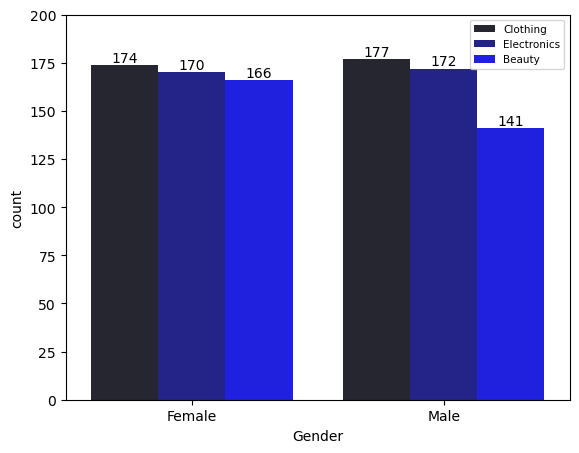

In [113]:
# Product Category Counts by Gender
plt.figure(figsize = (6.5,5))
gender_choice = df.groupby("Gender")["Product Category"].value_counts().reset_index(name = "count")
ax = sns.barplot(data = gender_choice , x = "Gender", y = "count", hue = "Product Category", palette = "dark:blue")
plt.ylim(0,200)
plt.legend(fontsize = 7.5)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

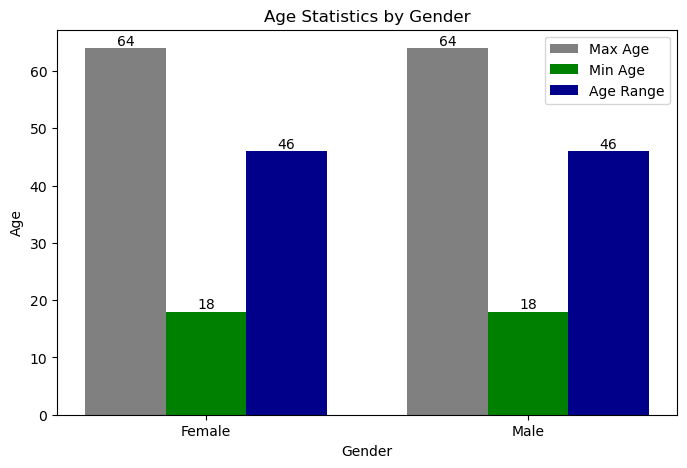

(   Gender  Max Age
 0  Female       64
 1    Male       64,
    Gender  Min Age
 0  Female       18
 1    Male       18,
    index  Age Range
 0      0         46
 1      1         46)

In [151]:
# Gender Age (Max, Min, and Range) 
max_age = df.groupby("Gender")["Age"].max().reset_index(name="Max Age")
min_age = df.groupby("Gender")["Age"].min().reset_index(name="Min Age")
age_range = (max_age["Max Age"] - min_age["Min Age"]).reset_index(name="Age Range")
result = pd.concat([max_age, min_age["Min Age"], age_range["Age Range"]], axis=1)
plt.figure(figsize=(8, 5))
bar_width = 0.25
x = range(len(result))
plt.bar([i - bar_width for i in x], result["Max Age"], width=bar_width, label='Max Age', color = "grey")
plt.bar(x, result["Min Age"], width=bar_width, label='Min Age', color= "green")
plt.bar([i + bar_width for i in x], result["Age Range"], width=bar_width, label='Age Range', color='darkblue')
for index, value in enumerate(result["Max Age"]):
    plt.text(index - bar_width, value, str(value), ha='center', va='bottom')
for index, value in enumerate(result["Min Age"]):
    plt.text(index, value, str(value), ha='center', va='bottom')
for index, value in enumerate(result["Age Range"]):
    plt.text(index + bar_width, value, str(value), ha='center', va='bottom')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Statistics by Gender')
plt.xticks(x, result['Gender'])
plt.legend()
plt.show()
max_age,min_age,age_range


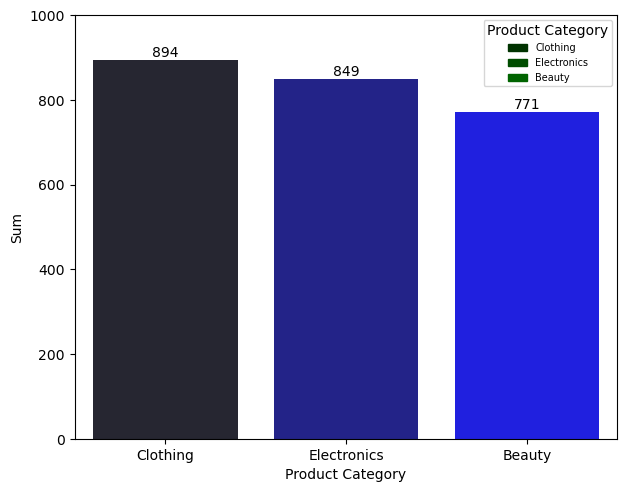

,Product Category,Sum
0,Clothing,894
1,Electronics,849
2,Beauty,771


In [149]:
# PRODUCT CATEGORY SUM BY QUANTITY
product_sum = df.groupby("Product Category")["Quantity"].sum().sort_values(ascending = False).reset_index(name = "Sum")
plt.figure(figsize = (7,5.5))
ax = sns.barplot(data = product_sum, x = "Product Category", y = "Sum", hue = "Product Category", palette = "dark:blue")
plt.ylim(0,1000)
legend_labels = ["Clothing", "Electronics", "Beauty"]
legend_colors = ["#003300", "#004d00", "#006400"] 
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(handles, legend_labels, title="Product Category", loc='upper right', fontsize = 7)
for container in ax.containers:
    ax.bar_label(container)
plt.show()
product_sum

,Product Category,Amount
0,Electronics,156905
1,Clothing,155580
2,Beauty,143515


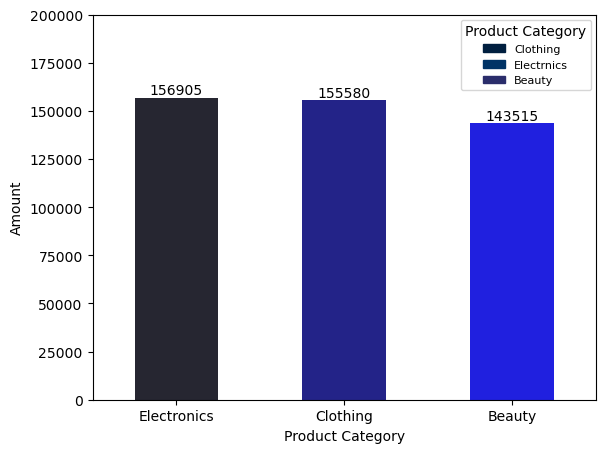

In [237]:
# TOTAL SELLS OF EACH PRODUCT CATEGORY
sells = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending = False).reset_index(name = "Amount")
plt.figure(figsize = (6.5,5))
ax = sns.barplot(data = sells, x = "Product Category", y = "Amount", hue = "Product Category", palette = "dark:blue", width = 0.5)
plt.ylim(0,200000)
legend_labels = ["Clothing", "Electrnics", "Beauty"]
legend_colors = ["#001F3F", "#003366","#2A2D6B"]
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in legend_colors]
plt.legend(handles, legend_labels, title="Product Category", loc='upper right', fontsize = 8)
for container in ax.containers:
    ax.bar_label(container)
sells

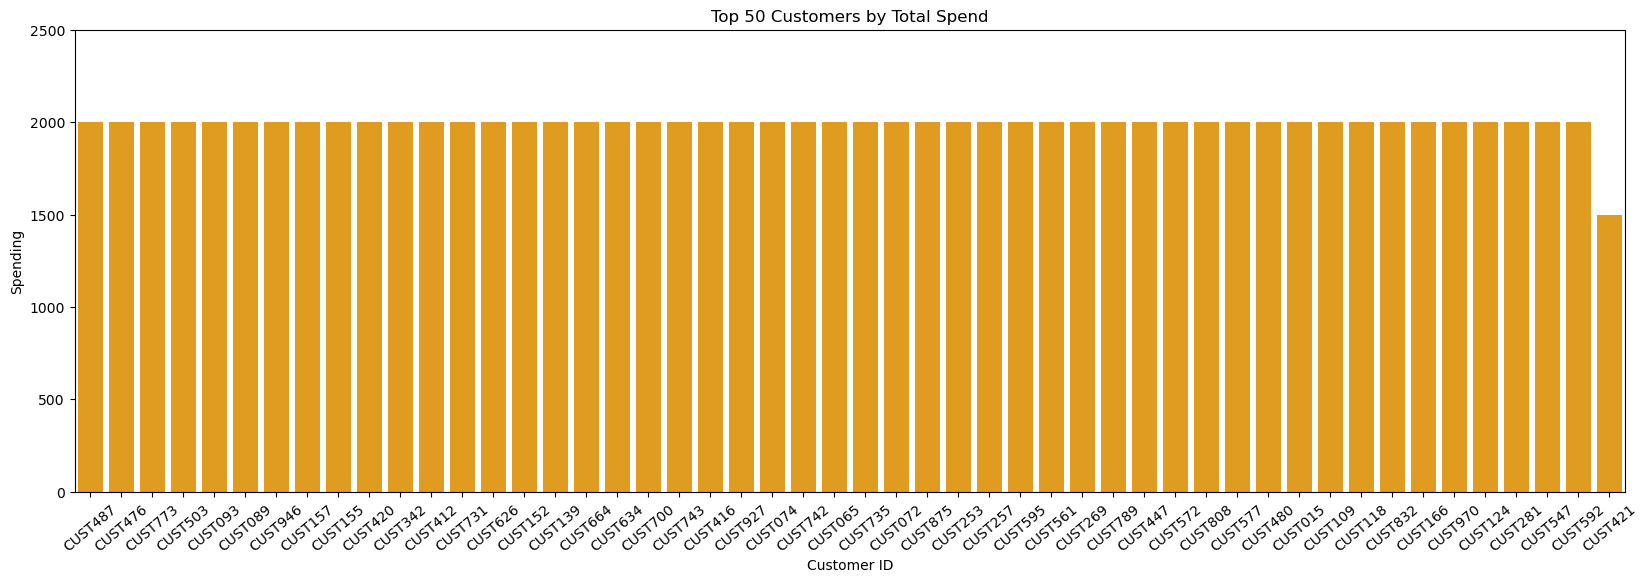

In [653]:
# TOP 50 SPENDING CUSTOMERS
top_customers = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).reset_index(name = "Spending").head(50)
plt.figure(figsize = (20,6))
sns.barplot(data = top_customers, x = "Customer ID", y = "Spending", color ='orange')
plt.ylim(0,2500)
plt.xticks(rotation = 40)
plt.title('Top 50 Customers by Total Spend')
plt.show()

Average Transaction Value: 456.00


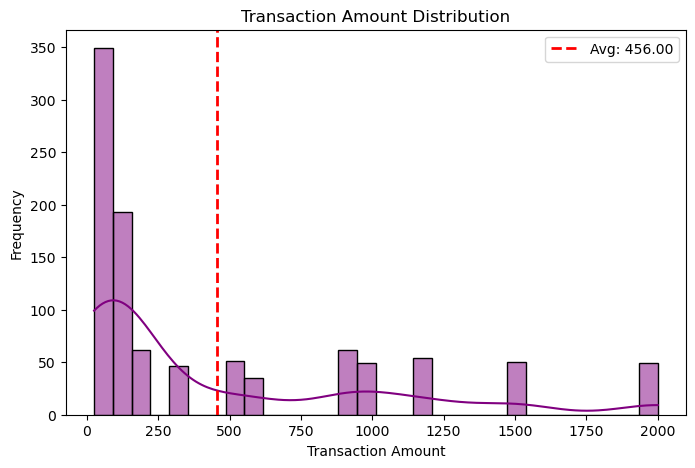

In [655]:
# AVERAGE TRANSACTION
average_transaction = df['Total Amount'].mean()
plt.figure(figsize=(8, 5))
sns.histplot(df['Total Amount'], bins=30, kde=True, color='purple')
plt.axvline(average_transaction, color='red', linestyle='--', linewidth=2, label=f'Avg: {average_transaction:.2f}')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Average Transaction Value: {average_transaction:.2f}')

Average Basket Size: 2.51 items per transaction


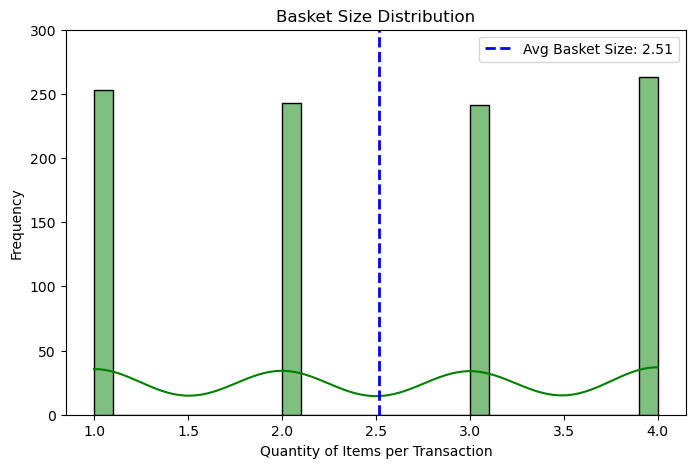

In [141]:
# AVG PRODUCT QUANTITY BOUGHT BY CUSTOMER
average_basket_size = df.groupby('Transaction ID')['Quantity'].sum().mean()
plt.figure(figsize=(8, 5))
sns.histplot(df.groupby('Transaction ID')['Quantity'].sum(), bins=30, kde=True, color='green')
plt.axvline(average_basket_size, color='blue', linestyle='--', linewidth=2, label=f'Avg Basket Size: {average_basket_size:.2f}')
plt.ylim(0,300)
plt.title('Basket Size Distribution')
plt.xlabel('Quantity of Items per Transaction')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print(f'Average Basket Size: {average_basket_size:.2f} items per transaction')

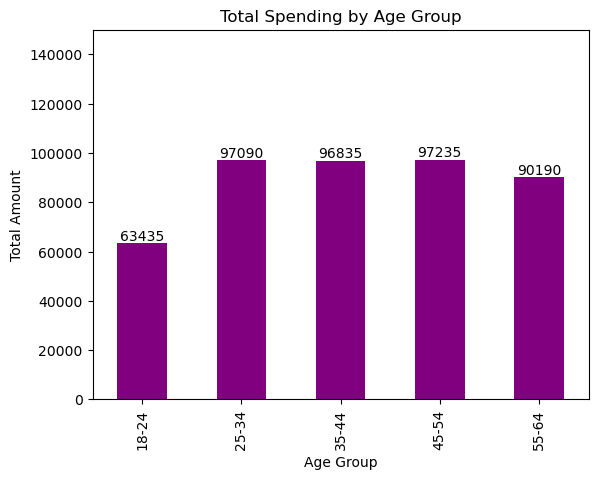

Age Group
18-24    63435
25-34    97090
35-44    96835
45-54    97235
55-64    90190
Name: Total Amount, dtype: int64

In [197]:
# TOTAL SPENDING BY AGE GROUP
age_bins = [18, 24, 34, 44, 54, 64, 100]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
age_group_spending = df.groupby('Age Group', observed = True)['Total Amount'].sum()
ax = age_group_spending.plot(kind='bar', color='purple')
for container in ax.containers:
    ax.bar_label(container)
    plt.ylim(0,150000)
plt.title('Total Spending by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.show()
age_group_spending

## Time Series Analysis: Analyze sales trends over time using time series techniques.

In [145]:
# COVERTING DATE COLUMN TO DATETIME DATATYPE
df['Date'] = pd.to_datetime(df['Date'])

# SETTING DATE COLUMN AS INDEX
df.set_index('Date', inplace=True)

In [663]:
# WEEKLY SALES TOTAL
weekly_sales = df['Total Amount'].resample('W').sum().reset_index().head(20)
weekly_sales.sort_values(by = 'Date')

,Date,Total Amount
0,2023-01-01,3600
1,2023-01-08,6100
2,2023-01-15,4850
3,2023-01-22,8215
4,2023-01-29,9845
5,2023-02-05,13070
6,2023-02-12,8365
7,2023-02-19,13815
8,2023-02-26,7645
9,2023-03-05,7155


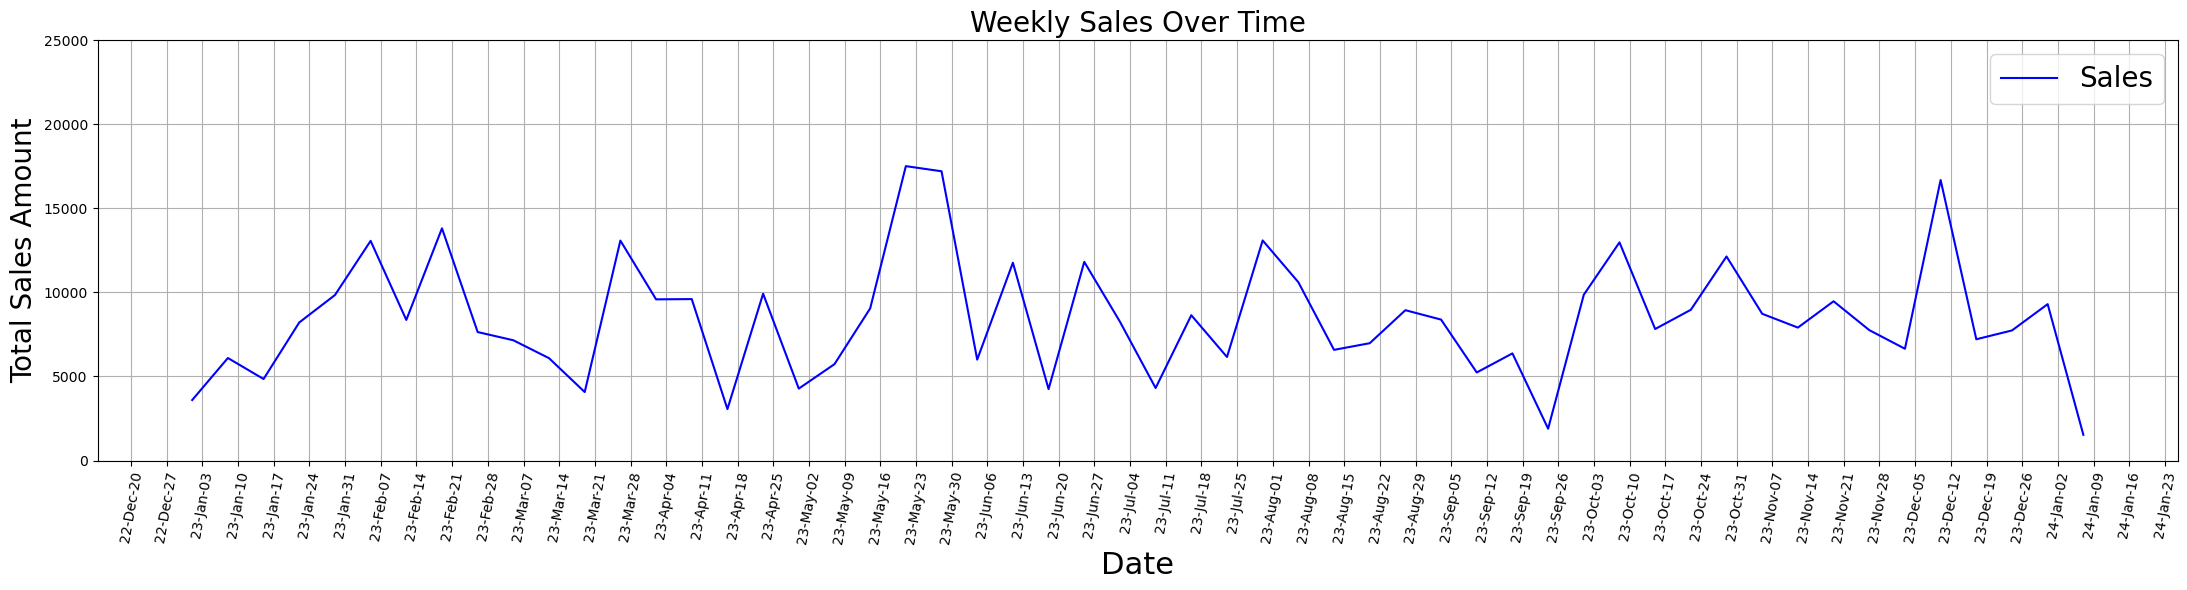

In [665]:
# WEEKLY SALES TOTAL
weekly_sales = df['Total Amount'].resample('W').sum().reset_index()
plt.figure(figsize=(22, 6))
plt.ylim(0, 25000)
sns.lineplot(data = weekly_sales, x ='Date', y ='Total Amount', color ='blue', linewidth = 1.5)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%b-%d')) 
plt.xticks(rotation = 80)
plt.legend(labels = ["Sales"], fontsize = 20)
plt.title('Weekly Sales Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 22)
plt.ylabel('Total Sales Amount', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

In [250]:
# MONTHLY TOTAL SALES
monthly_sales = df['Total Amount'].resample('ME').sum().reset_index()
monthly_sales.sort_values(by = "Date")

,Date,Total Amount
0,2023-01-31,35450
1,2023-02-28,44060
2,2023-03-31,28990
3,2023-04-30,33870
4,2023-05-31,53150
5,2023-06-30,36715
6,2023-07-31,35465
7,2023-08-31,36960
8,2023-09-30,23620
9,2023-10-31,46580


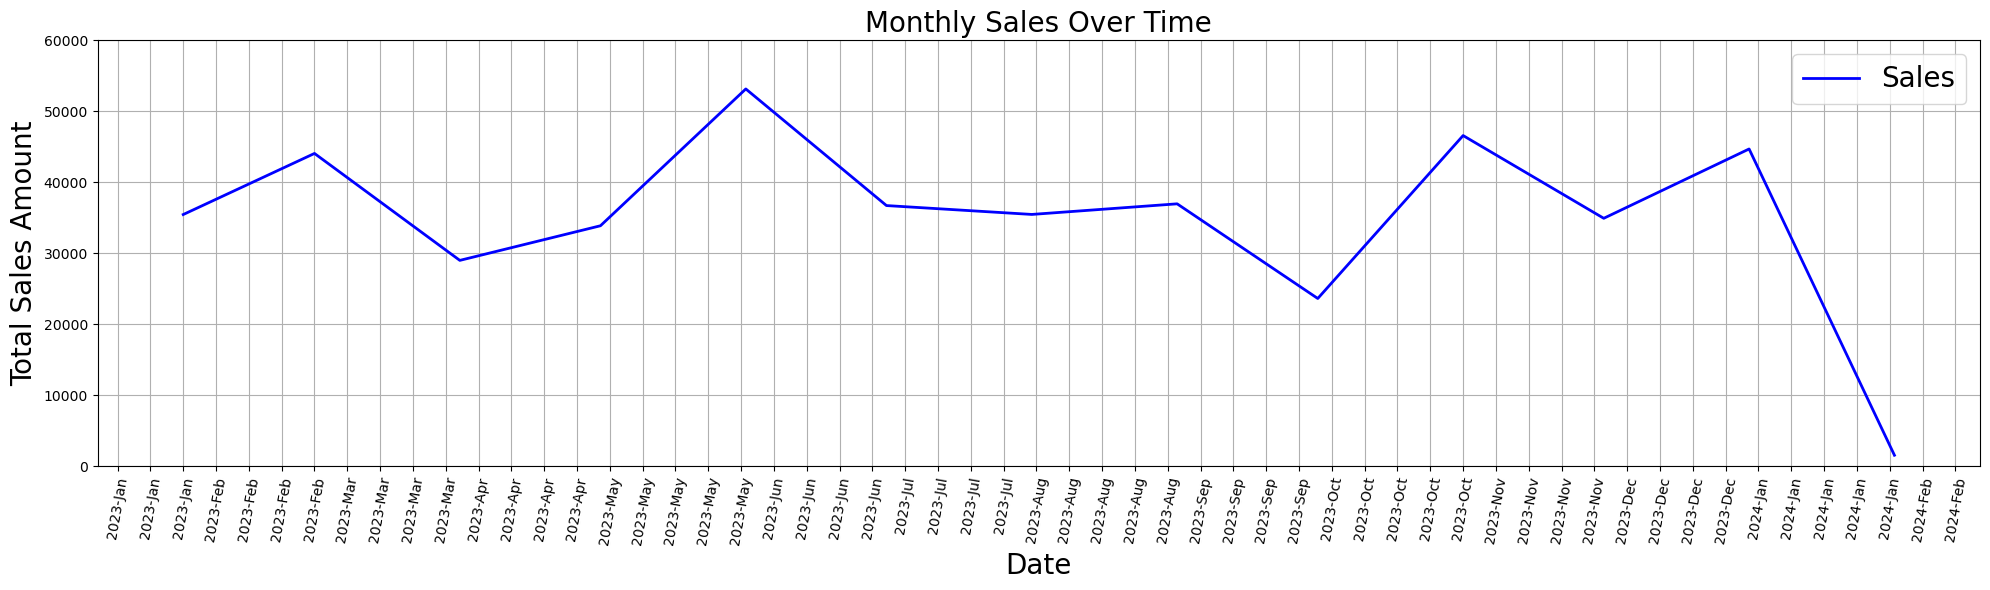

In [667]:
# MONTHLY TOTAL SALES
monthly_sales = df['Total Amount'].resample('ME').sum().reset_index()
plt.figure(figsize=(20, 6))
plt.ylim(0, 60000)
sns.lineplot(data = monthly_sales, x ='Date', y ='Total Amount', color ='blue', linewidth = 2)
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b')) 
plt.xticks(rotation = 80)
plt.legend(labels = ["Sales"], fontsize = 20)
plt.title('Monthly Sales Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Sales Amount', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

In [515]:
# YEARLY SALES TOTAL
yearly_sales = df['Total Amount'].resample('YE').sum().reset_index()
yearly_sales.sort_values(by = "Date")

,Date,Total Amount
0,2023-12-31,454470
1,2024-12-31,1530


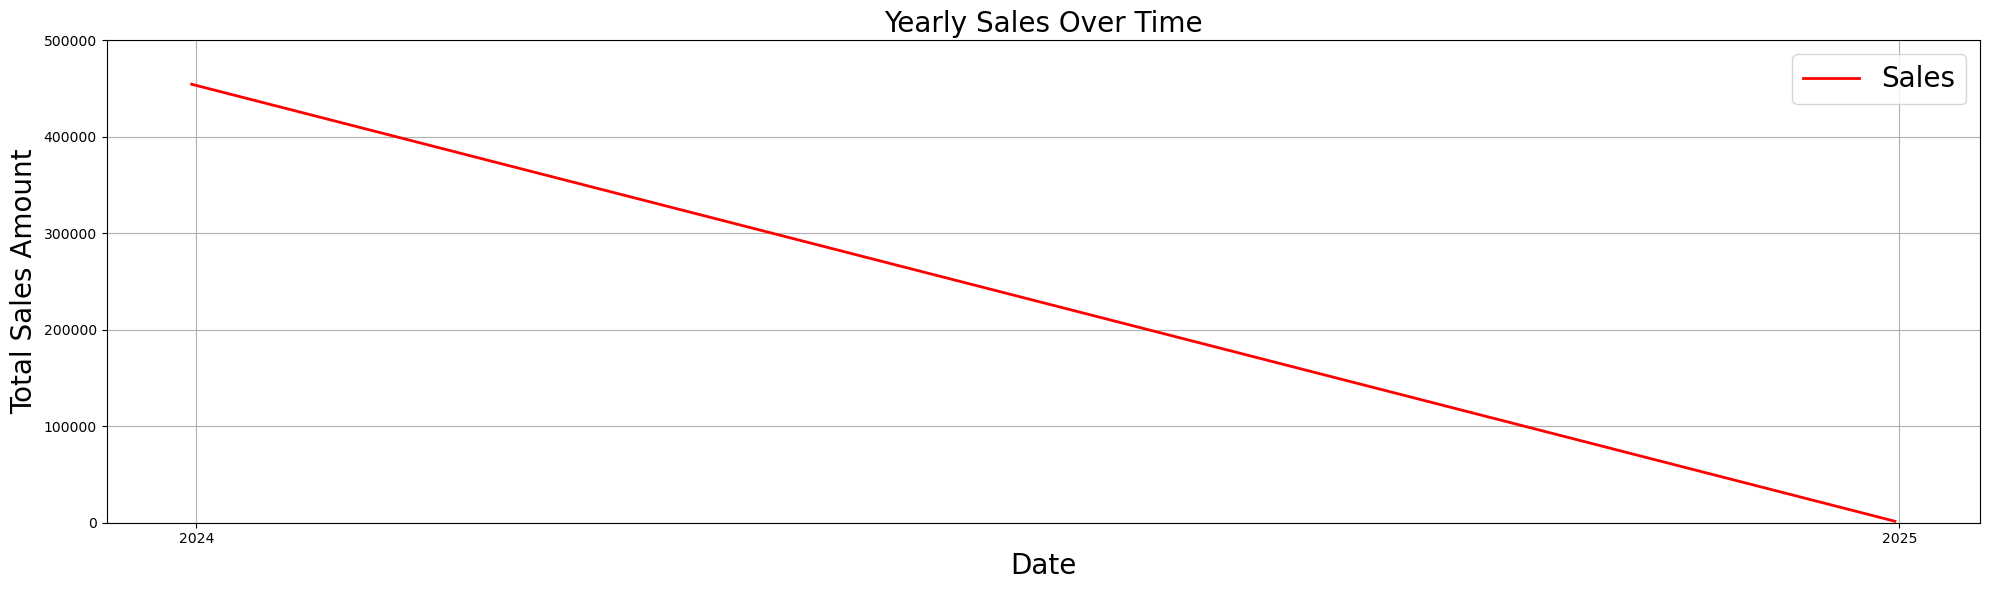

In [669]:
# YEARLY SALES TOTAL
yearly_sales = df['Total Amount'].resample('YE').sum().reset_index()
plt.figure(figsize=(20, 6))
plt.ylim(0, 500000)
sns.lineplot(data = yearly_sales, x ='Date', y ='Total Amount', color ='red', linewidth = 2)
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) 
plt.legend(labels = ["Sales"], fontsize = 20)
plt.title('Yearly Sales Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Sales Amount', fontsize = 20)
plt.grid()
plt.tight_layout()
plt.show()

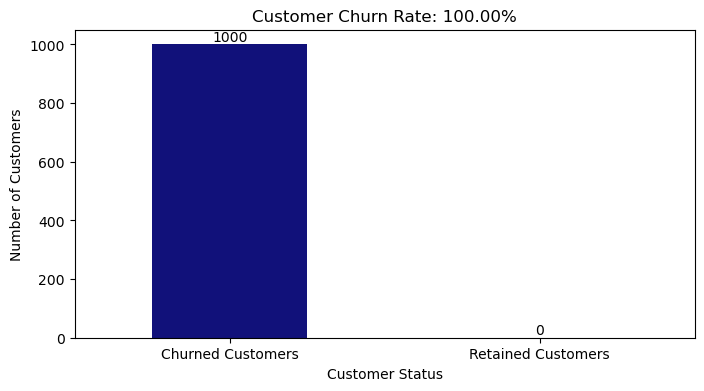

(1000, 0, 100.0)

In [167]:
# CHURN CUSTOMERS, RETAINED CUSTOMERS & CHURN RATE
customer_purchase_frequency = df.groupby('Customer ID')['Transaction ID'].nunique().reset_index(name="Transaction Count")
churned_customers = customer_purchase_frequency[customer_purchase_frequency['Transaction Count'] == 1].count().iloc[0]
retained_customers = customer_purchase_frequency[customer_purchase_frequency['Transaction Count'] > 1].count().iloc[0]
churn_rate = (churned_customers / len(customer_purchase_frequency)) * 100
plt.figure(figsize=(8, 4))
ax = sns.barplot(x = ['Churned Customers', 'Retained Customers'], y = [churned_customers, retained_customers], color = "darkblue", width = 0.5)
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Number of Customers")
plt.xlabel("Customer Status")
plt.title(f"Customer Churn Rate: {churn_rate:.2f}%")
plt.show()
churned_customers,retained_customers,churn_rate

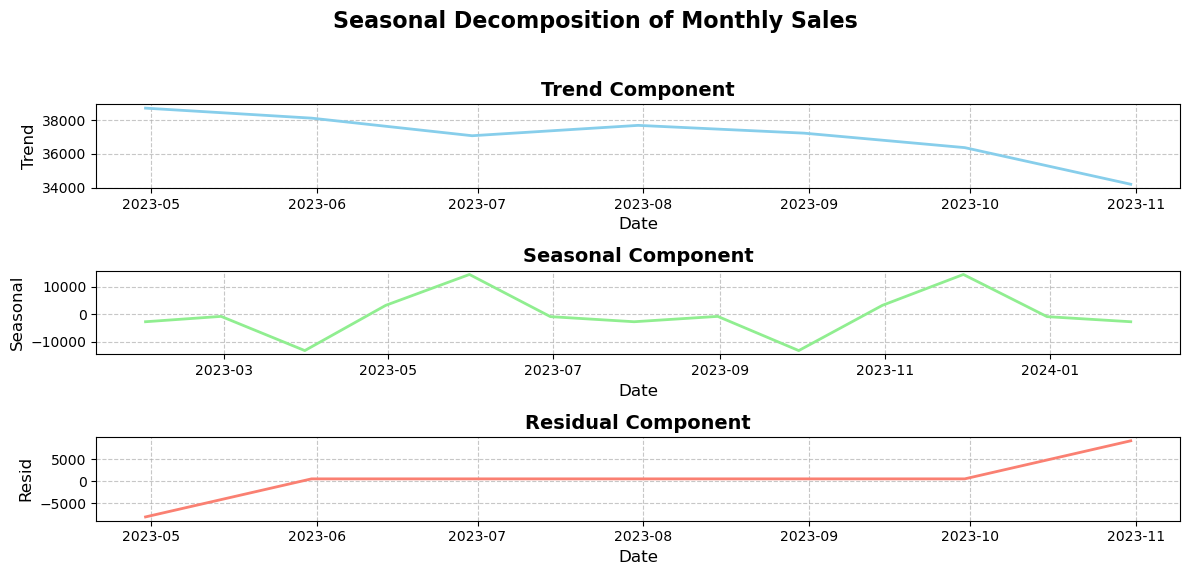

In [169]:
# SEASONAL DECOMPOSITION ON MONTHLY SALES 
monthly_sales = df['Total Amount'].resample('ME').sum()
decomposition = seasonal_decompose(monthly_sales, model='additive', period = 6)
plt.figure(figsize=(12, 6))
components = ['trend', 'seasonal', 'resid']
titles = ['Trend Component', 'Seasonal Component', 'Residual Component']
colors = ['skyblue', 'lightgreen', 'salmon']
for i, component in enumerate(components):
    plt.subplot(3, 1, i + 1) 
    plt.plot(decomposition.observed if component == 'observed' else getattr(decomposition, component), color=colors[i], linewidth=2)
    plt.title(titles[i], fontsize=14, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel(component.capitalize(), fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7) 
plt.suptitle('Seasonal Decomposition of Monthly Sales', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


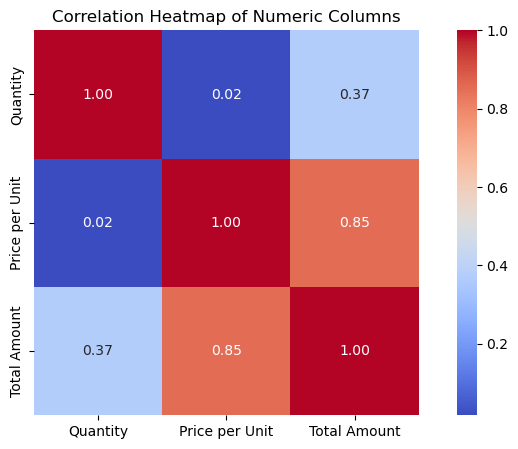

In [171]:
# CORRELATION AMONG NUMERICAL COLUMNS
correlation_matrix = df[['Quantity', 'Price per Unit', 'Total Amount']].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Numeric Columns', fontsize=12)
plt.show()

In [179]:
# RESETTING INDEX
df.reset_index(inplace = True)

In [201]:
# DROPPING THE COLUMN WE ADDED
df.drop("Age Group", axis = 1, inplace = True)

## Recommendations: Actionable Recommendations Based On The EDA.

## Key Insights:

### Product Sales:
#### 1. Clothing:
    High quantity sold, indicating steady demand.

#### 2. Electronics: 
    Generates the highest revenue, likely due to higher prices/margins.

#### 3. Customer Demographics:
    Distinct purchase preferences by age and gender.

#### 4. Customer Churn:
    Notable churn rate, with many single-purchase customers.
    Repeat customers are crucial, adding significantly to revenue.

#### 5. Sales Seasonality:
    Certain months see higher sales, which is useful for planning promotions and stock.

### Recommendations:

### Targeted Promotions:

#### 1. Electronics: 
    Cross-sell items such as warranties and run high-value promotions in peak periods.

#### 2. Clothing:
    Offer volume discounts, for example: buy two, get one free, to boost the quantity sold.

#### 3. Loyalty & Retention:
    Introduce a loyalty program for top spenders and targeted offers for new customers to reduce churn.

#### 4. Demographic Marketing:
    Customize campaigns based on age and gender preferences, for example: promoting Electronics to younger audiences.

#### 5. Inventory Management:
    Stock up on high-demand Clothing items for peak months and manage Electronics inventory to prevent overstocking.

#### 6. Increase Basket Size:
    Encourage larger purchases with "buy more, save more" offers and cross-category bundles, for example, Clothing + Beauty.

#### Implementing these strategies can drive profitability, improve customer loyalty, and align inventory with demand for sustainable growth.